<a href="https://colab.research.google.com/github/AryanSai/Deep-Learning/blob/main/23352_Asmt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Consider a neural network with 4 layers of 500 neurons each. Initialize the weights of each of these layers to samples from Gaussian with mean 0 and standard deviation 0.01. The i/p layer consists of 1000 features randomly sampled from the standard Gaussian. Do only the forward propagation once of the input with tanh as the activation function in all the layers. At the end of forward propagation, plot layer-wise (including input layer) histogram of activation values. What do you observe?

In [9]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [10]:

class NeuralNetwork(nn.Module):
    def __init__(self,act_function,meann,sd=0,weights=0):
        super().__init__()

        self.inputLayer = nn.Linear(1000, 500)
        self.layer1 = nn.Linear(500, 500)
        self.layer2 = nn.Linear(500, 500)
        self.outputlayer = nn.Linear(500, 10)

        self.init_weights(self.inputLayer.weight, weights, meann, sd)
        self.init_weights(self.layer1.weight, weights, meann, sd)
        self.init_weights(self.layer2.weight, weights, meann, sd)
        self.init_weights(self.outputlayer.weight, weights, meann, sd)

        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            self.inputLayer,
            act_function,
            self.layer1,
            act_function,
            self.layer2,
            act_function,
            self.outputlayer,
            act_function,
        )

    def init_weights(self, tensor, method,meann,sd):
        if method == 'xavier':
            nn.init.xavier_normal_(tensor)
        elif method == 'he':
            nn.init.kaiming_uniform_(tensor, mode='fan_in', nonlinearity='relu')
        elif method == 'normal':
            nn.init.normal_(tensor, mean=meann, std=sd)
        else:
            raise ValueError(f"Unsupported initialization method: {method}")

    def forward(self, x, act_function):
        self.activations = [x]
        for layer in self.linear_stack:
            x = layer(x)
            if type(layer) == type(act_function): #detach since we dont need gradients
                self.activations.append(x.detach().numpy().flatten())  # collect activations after Tanh layer
        return x

In [11]:
def create_model(act_function,weights,mean=0,sd=0):
  # create a model
  model = NeuralNetwork(act_function,mean,sd,weights)

  # forward propagation (activations are also collected during the pass)
  x = torch.randn(1, 1000)
  predictions = model(x,act_function)

  return model

def plot_histogram(model,act_function):
  # Histograms plotting
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
  axes = axes.flatten()

  # Collect and plot the layer activations
  for i, activation in enumerate(model.activations):
      if i==0:
        axes[i].hist(activation, bins=50, edgecolor='black')
        axes[i].set_title(f'Input Layer Activation Histogram')
      elif i==4:
        axes[i].hist(activation, bins=10, edgecolor='black')
        axes[i].set_title(f'Output Layer Activation Histogram')
      else:
        axes[i].hist(activation, bins=50, edgecolor='black')
        axes[i].set_title(f'{act_function} Layer {i} Activation Histogram')

  plt.tight_layout()
  plt.show()

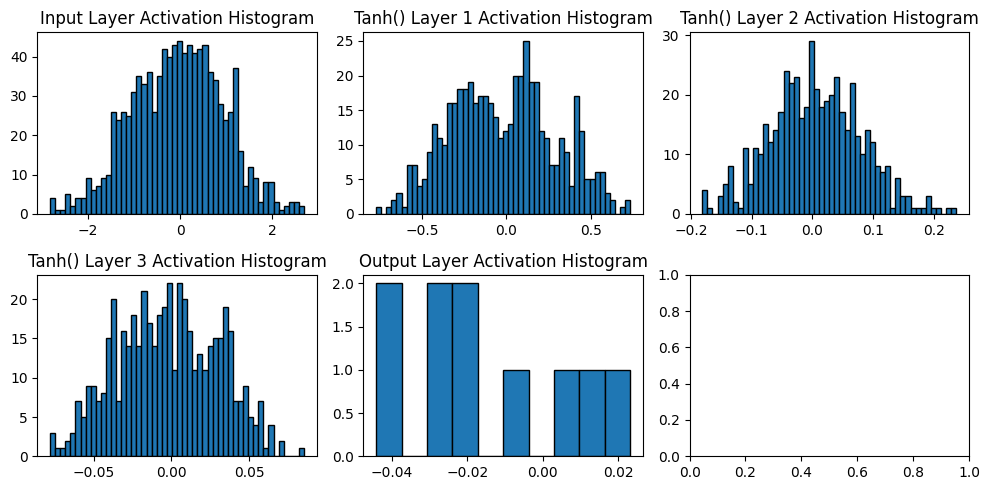

In [ ]:
#tan h activation function
act_function=nn.Tanh()
model = create_model(act_function,'normal',0,0.01)
plot_histogram(model,act_function)

**Observations:**
*   Since the activation function used is Tanh,  As the input passes through each layer with Tanh activation, the activations tend to become smaller and smaller. This is because the tanh function maps larger inputs closer to the extremes of [-1, 1].
As we progress deeper into the network, the effect of the tanh function becomes more visible, leading to activations closer to zero.

*  The histograms of activation values suggest that the activations are more concentrated around zero as you move deeper into the network.
The decreasing range of activations ([2, -2] -> [-0.5, 0.5] -> [-0.2, 0.2] -> [-0.05, 0.05]) is aligning with the behavior of the tanh function.

The input layer distribution is normal and the input layers also almost follow normal distribution.

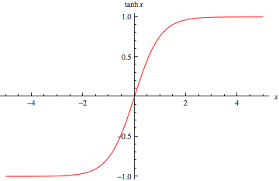

# 2. Repeat the above experiment for sigmoid activation. What do you observe?

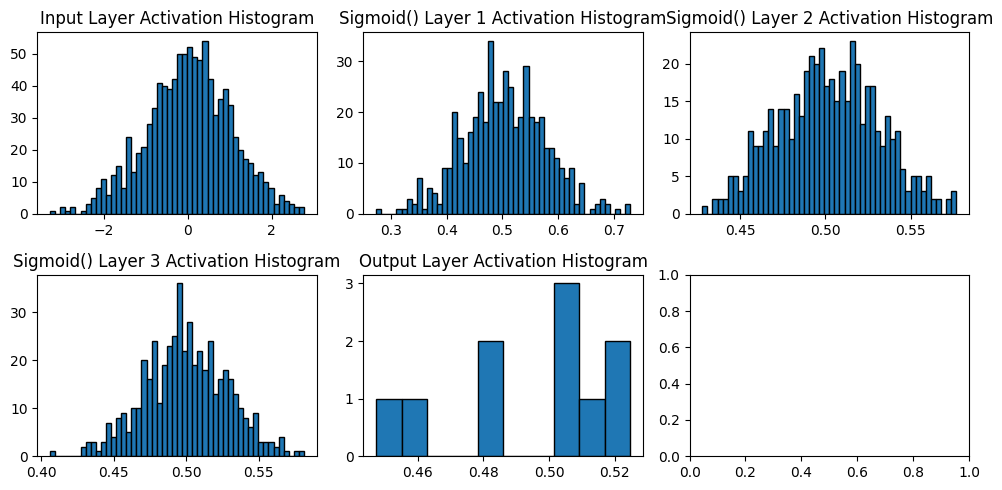

In [ ]:
#sigmoid activation function
act_function=nn.Sigmoid()
model = create_model(act_function,'normal',0,0.01)
plot_histogram(model,act_function)

**Observations:**
* The sigmoid function maps input values to the range [0, 1] and hence the values are all non-negative.   

*  Due to the sigmoid function's shape, the activations tend to cluster around 0.5.
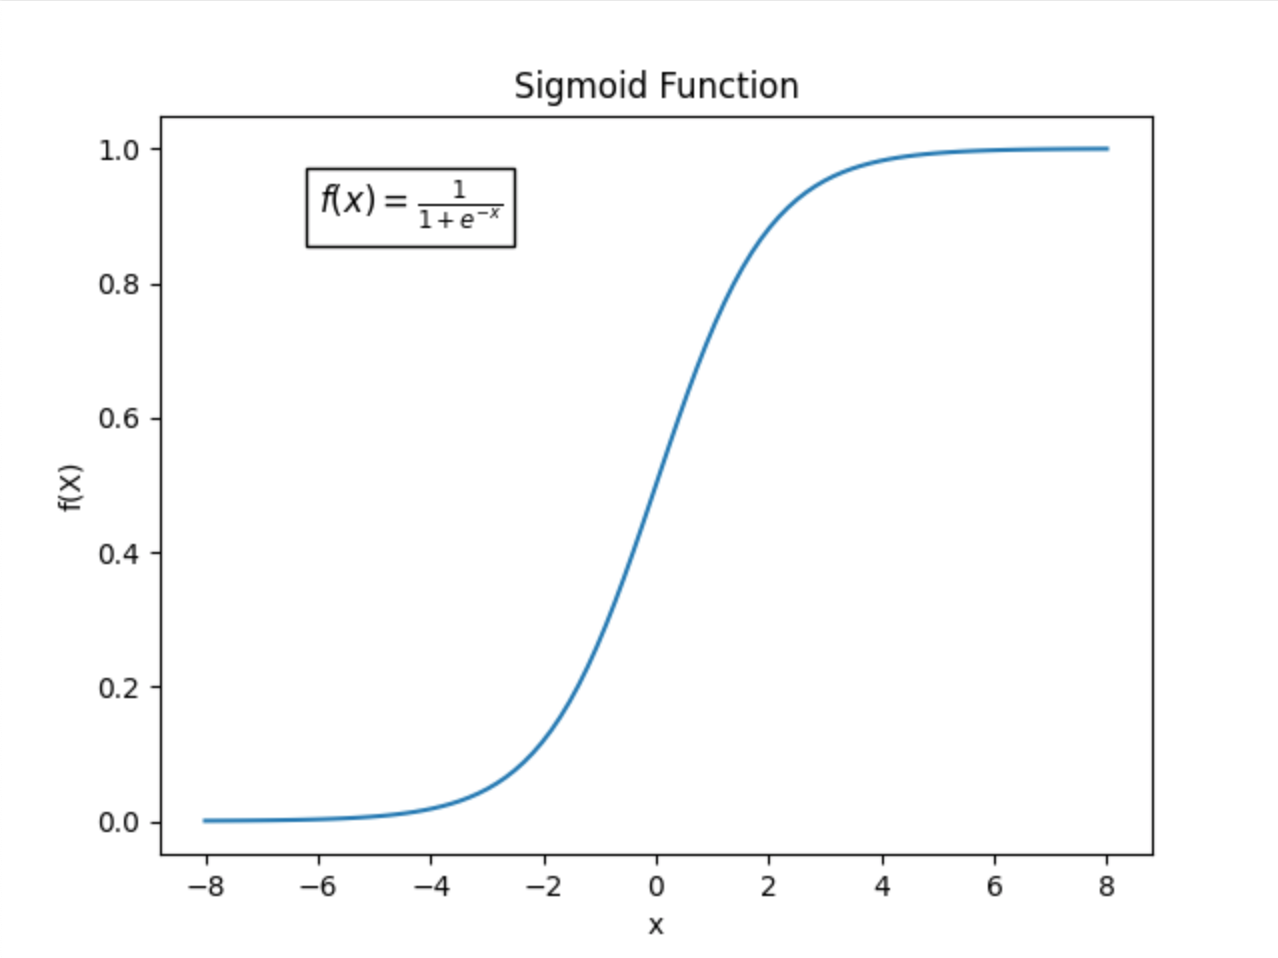

# 3. Repeat the above experiment for ReLU activation. What do you observe?

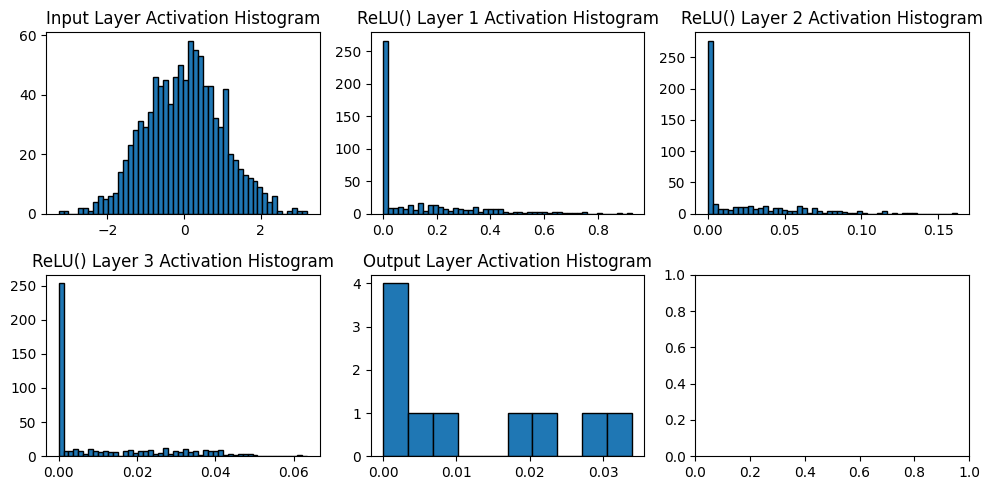

In [ ]:
#relu activation function
act_function=nn.ReLU()
model = create_model(act_function,'normal',0,0.01)
plot_histogram(model,act_function)

**Observations:**
*   Since ReLU(x) = max(0, x) ; the negative activation become zero! This is the reason many of the activations are zero!

*  We can see a decrease in the spread of activation values like above.

*   The output layer activations are predominantly zero.

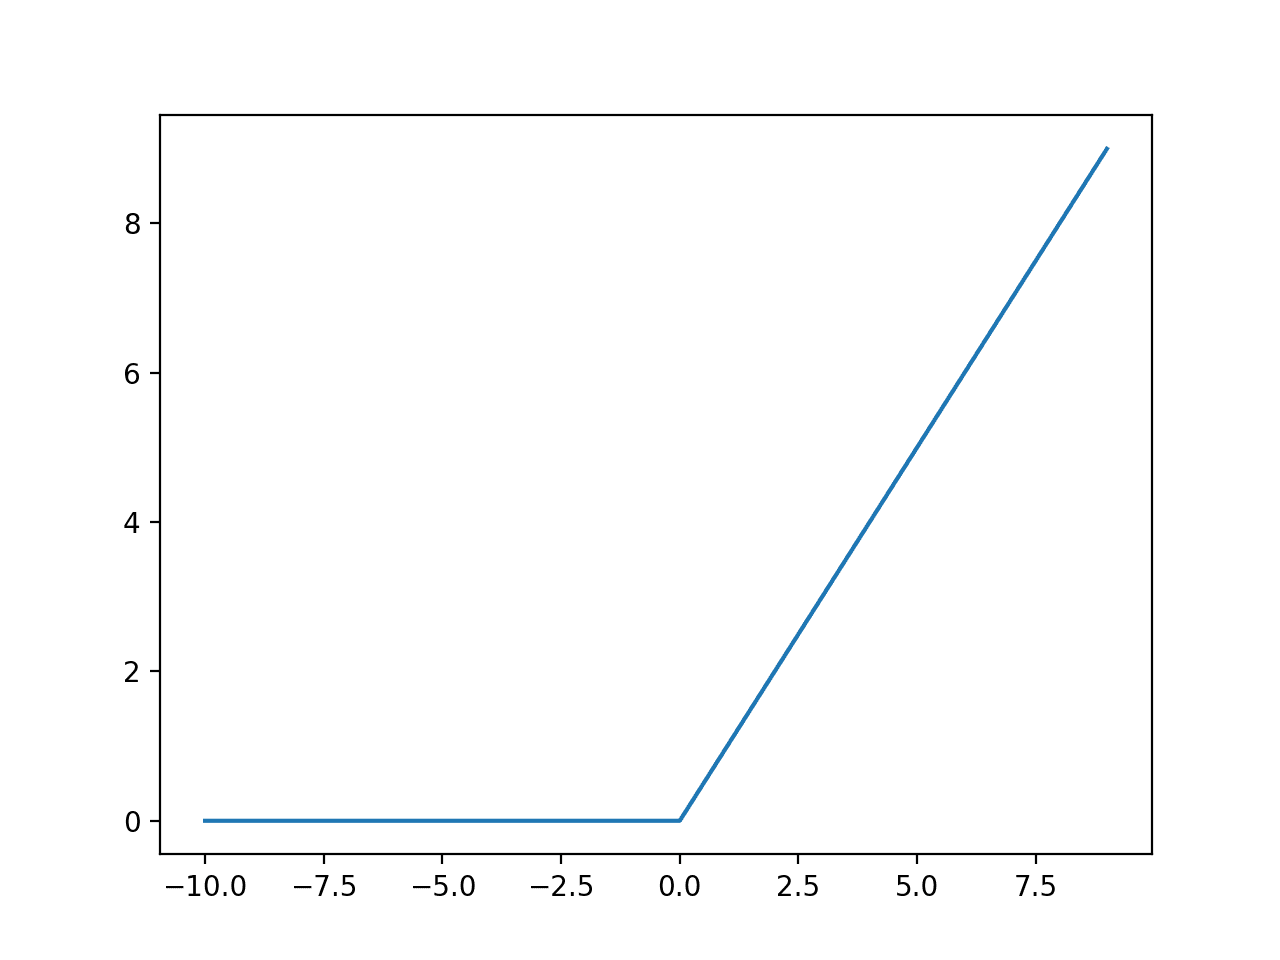

# 4. Repeat the above experiment again for tanh, sigmoid and ReLU, but now with weights initialized to samples from standard Gaussian. What do you observe?

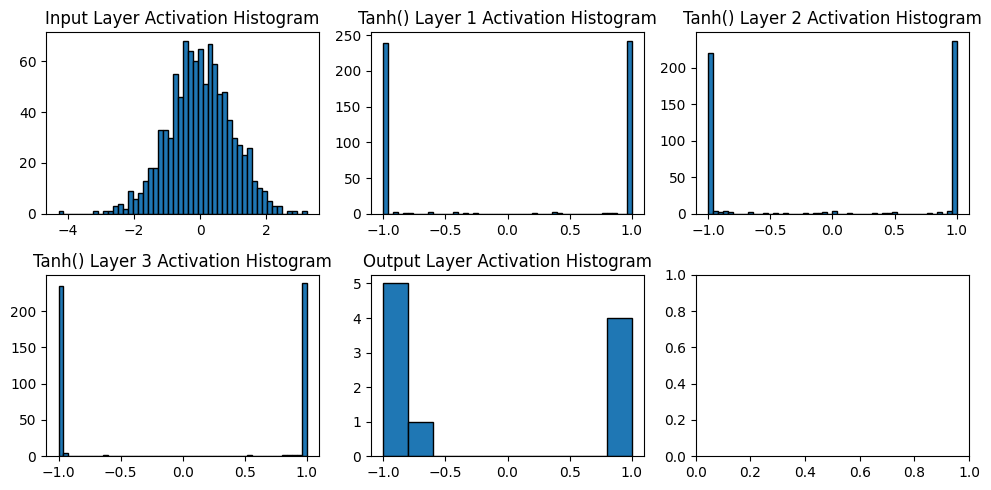

In [4]:
#Tanh activation function with weights initialized to samples from standard Gaussian
act_function=nn.Tanh()
model = create_model(act_function,'normal',0,1)
plot_histogram(model,act_function)

**Observations:**

*   As the input to the Tanh function becomes very large (positive or negative), the output saturates to +1 or -1. (since weights are large, the products of weights and input becomes large.)

*  The activations of output layer are tending to become -1 or 1, because of effect of the Tanh activation function.

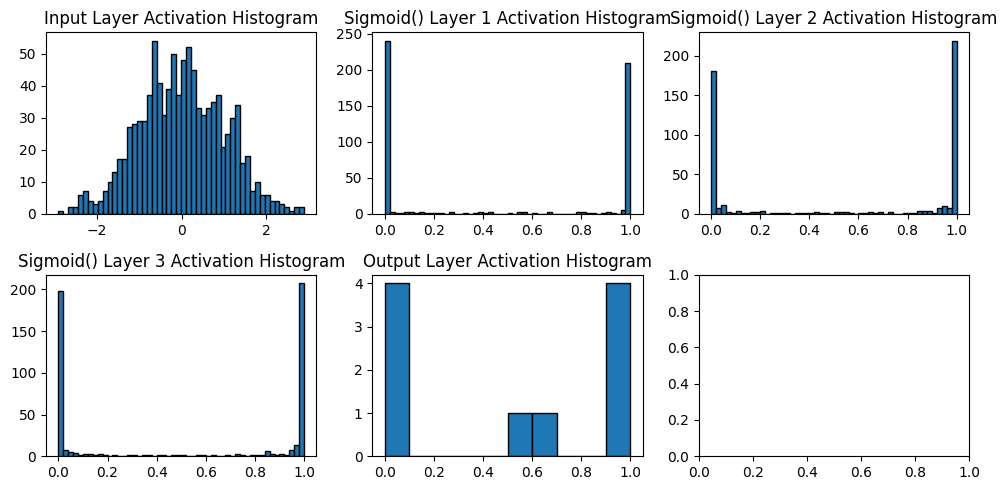

In [10]:
#sigmoid activation function with weights initialized to samples from standard Gaussian
act_function=nn.Sigmoid()
model = create_model(act_function,'normal',0,1)
plot_histogram(model,act_function)

**Observations:**
*   In case of sigmoid function, the activations are highly concentrated near 0 and 1(It can lead to vanishing gradient problem!)

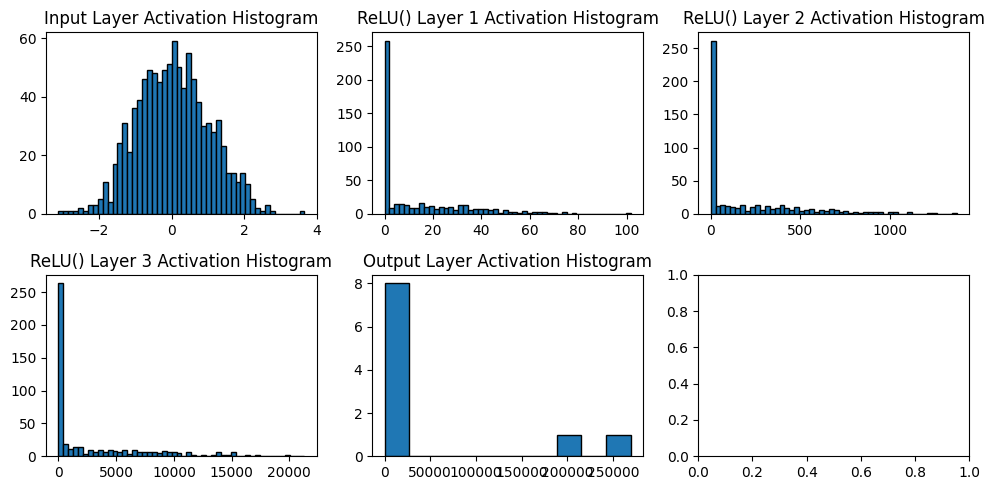

In [21]:
#relu activation function with weights initialized to samples from standard Gaussian
act_function=nn.ReLU()
model = create_model(act_function,'normal',0,1)
plot_histogram(model,act_function)

**Observations:**
*   In case of ReLU function, the activations are highly concentrated near 0(this happens because of the nature of ReLU)

*   But the range of the activations is quite large at every layer.


# 5. Now repeat the above experiment with **Xavier Weight Initialization** on all the 3 activations. What do you observe?

The goal of Xavier Initialization is to initialize the weights such that the variance of the activations are the same across every layer. This constant variance helps prevent the gradient from exploding or vanishing.

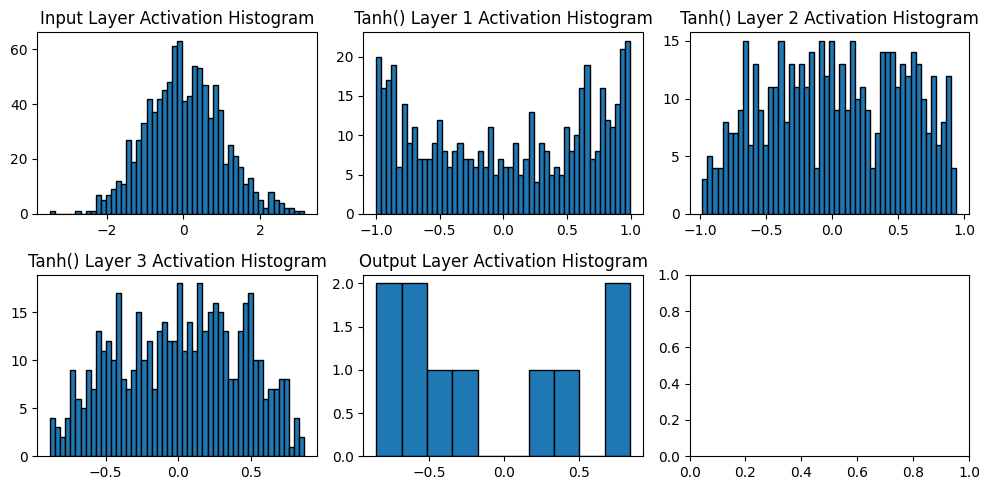

In [15]:
#Tanh activation function with weights initialized to samples from Xavier Initialisation
act_function=nn.Tanh()
model = create_model(act_function,'xavier')
plot_histogram(model,act_function)

**Observations:**
*   Compared to Standard Gaussian, here the activations are more uniformly distributed.

*   Xavier Initialization keeps the variance of activations and gradients relatively constant across layers. hence, the activations of neurons are not saturated at extreme values like +1 or -1, compared to standard normal weight initialization.



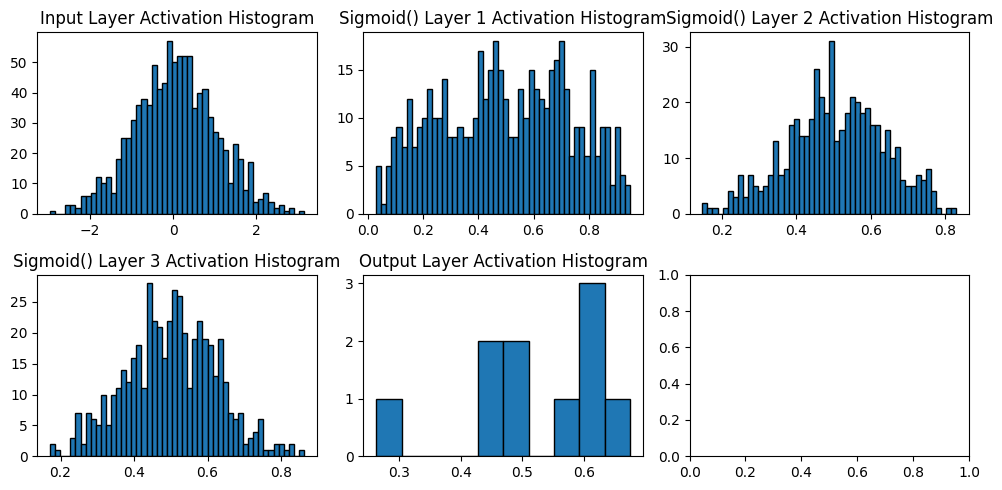

In [17]:
#Sigmoid activation function with weights initialized to samples from Xavier Initialisation
act_function=nn.Sigmoid()
model = create_model(act_function,'xavier')
plot_histogram(model,act_function)

**Observations:**

*  It avoids vanishing gradient by scaling the initial weights based on the number of input and output neurons.

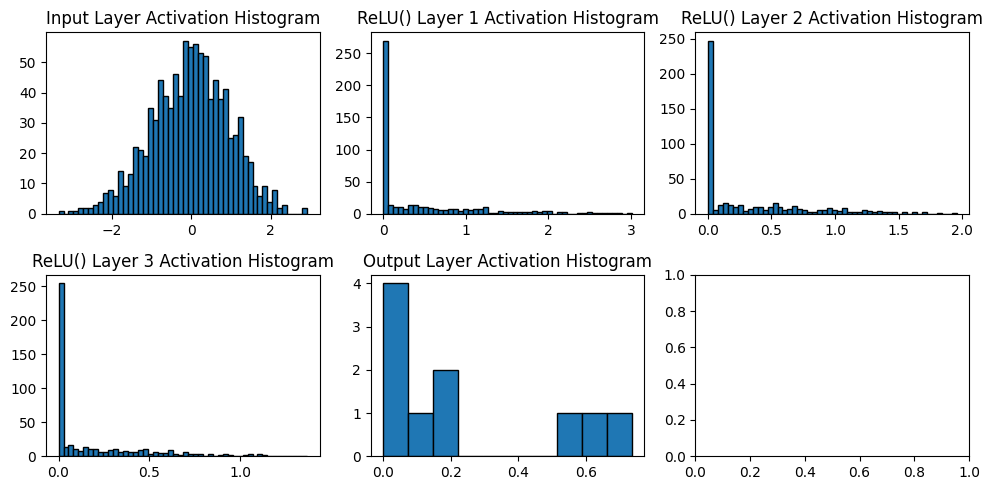

In [14]:
#ReLu activation function with weights initialized to samples from Xavier Initialisation
act_function=nn.ReLU()
model = create_model(act_function,weights='xavier')
plot_histogram(model,act_function)

**Observations:**

*   We can see a decrease in the spread of activation values from [0,3] -> [0,2] -> [0,1] .

*   Compared to Standard Gaussian, Xavier makes the activations small..(Standard Gaussian gave very large range activations...)

This prevents exploding or vanishing gradient problem.



# 6. Now repeat the above experiment with He Weight Initialization on all the 3 activations. What do you observe?

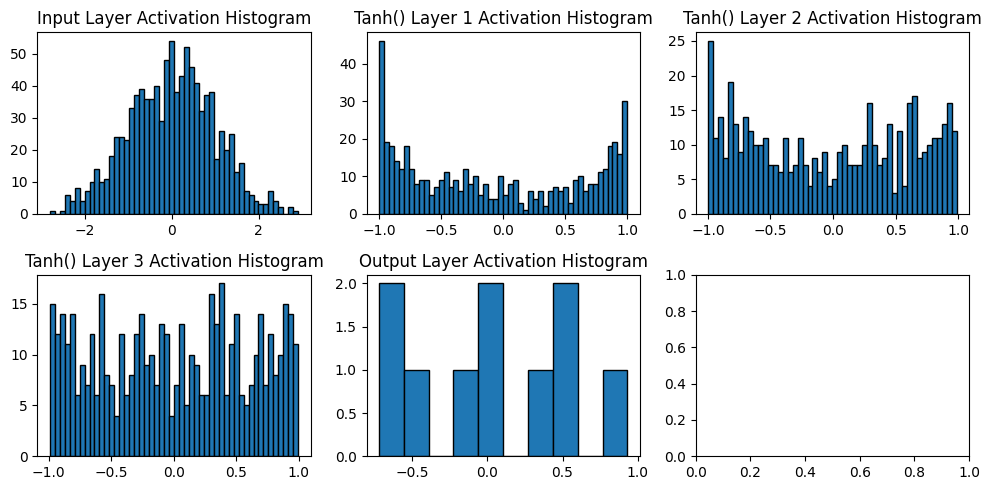

In [18]:
#Tanh activation function with weights initialized to samples from He Initialisation
act_function=nn.Tanh()
model = create_model(act_function,'he')
plot_histogram(model,act_function)

**Observations:**
*  With He initialization, the activations are tending to be more evenly distributed than standard normal initialization.(Because He initialization scales the initial weights based on the number of input units to the layer)

*   This helps prevent the gradients from vanishing or exploding.

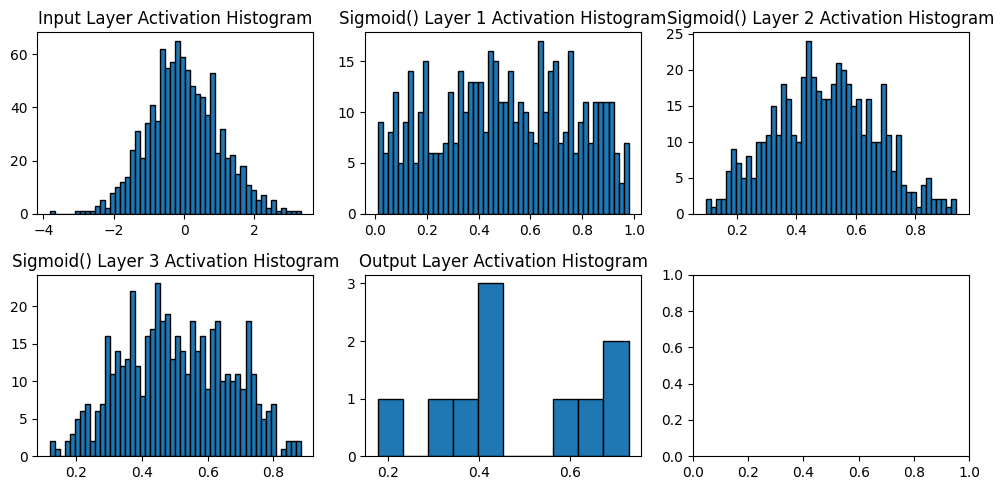

In [19]:
#Sigmoid activation function with weights initialized to samples from He Initialisation
act_function=nn.Sigmoid()
model = create_model(act_function,'he')
plot_histogram(model,act_function)

**Observations:**
With He initialization, the activations are tending to be more evenly distributed than standard normal initialization.(Because He initialization scales the initial weights based on the number of input units to the layer)

With every layer, the distribution of activations is tending to become normal distribution.

This helps prevent the gradients from vanishing or exploding.

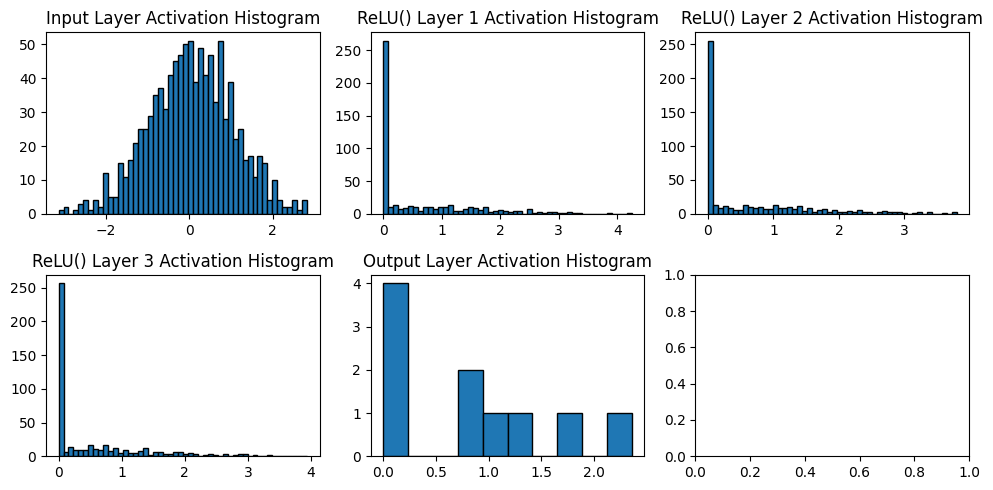

In [20]:
#ReLu activation function with weights initialized to samples from He Initialisation
act_function=nn.ReLU()
model = create_model(act_function,'he')
plot_histogram(model,act_function)

**Observations:**

*   The range of activations is more or less same in every layer [0,4]

*   He initialization adjusts the variance of weights based on the number of input units to the layer. This helps to keep the activations distributed more evenly,and prevents from becoming too large.


# 7. In the first lab assignment, use ReLU activation (in the hidden layers) and He weight initialization and train the model. Does the model train faster? Does it perform better on valid/test set?

In [1]:
import torch
from torch import nn #building blocks needed to build the NN
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

#loading the training data
training_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
#loading the test data
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


#wraping iterators around the datasets
train_dataloader=DataLoader(training_data,batch_size=32)
test_dataloader=DataLoader(test_data,batch_size=32)

100%|██████████| 26421880/26421880 [00:01<00:00, 19543558.55it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 341440.96it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6164126.24it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17232463.68it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:


class NeuralNetwork(nn.Module): #subclass of the nn.Module
    def __init__(self): #constructor

      super().__init__() #calling the parent's constructor

      self.flatten = nn.Flatten() #flatten layer before sending to the linear layers
      #defining the three layers with ReLu activations

      self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28,64), #(input,output) ;64 hidden nodes in layer 1
          nn.ReLU(),
          nn.Linear(64,128), #128 hidden nodes in layer 1
          nn.ReLU(),
          nn.Linear(128,10),
    )

     # HE initialization for linear layers
      for layer in self.linear_relu_stack.children():
          if isinstance(layer, nn.Linear):
              torch.nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')

    def forward(self,x): #the forward pass of the NN
      x=self.flatten(x) #flatten the input tensor
      logits=self.linear_relu_stack(x) #pass the input through linear stack and store output in logits
      return logits

def train_loop(dataloader, model, loss_fn, optimizer):
      size = len(dataloader.dataset) #get the size of the dataset
      model.train()
      for batch, (X,y) in enumerate(dataloader):
        #computing the prediction and loss
        pred=model(X)
        loss=loss_fn(pred,y)
        #back propagation
        loss.backward() # Compute gradients
        optimizer.step() # Update weights
        optimizer.zero_grad() # Zero out gradients for next iteration

        if batch%1000 == 0:
          loss, current = loss.item(), (batch+1)*len(X)
          print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    model.eval() #set the model to evaluation mode

    size = len(dataloader.dataset)
    num_batches = len(dataloader) #total number of batches in the data loader

    test_loss=0 #total loss
    correct = 0 #number of correct prediction

    with torch.no_grad(): #disables gradient computation
        for X, y in dataloader:
            pred = model(X) #forward pass to obtain predictions from the model
            test_loss += loss_fn(pred, y).item() #find loss and accumulate it
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #count correct prediction
    test_loss /= num_batches #average test loss over all batches
    correct /= size #accuracy
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [7]:

model = NeuralNetwork() #creating an instance of the nn

learning_rate = 1e-2 #rate at which the parameters are updated
batch_size = 64 #no. of samples processed before updating the parameters
epochs = 30 #no. of times the whole dataset is iterated over

loss_fn = nn.CrossEntropyLoss() #loss function(cross-entropy)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #stochastic gradient descent

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.670240  [   32/60000]
loss: 0.621523  [32032/60000]
Test Error: 
 Accuracy: 80.6%, Avg loss: 0.549846 

Epoch 2
-------------------------------
loss: 0.435313  [   32/60000]
loss: 0.549775  [32032/60000]
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.493959 

Epoch 3
-------------------------------
loss: 0.364086  [   32/60000]
loss: 0.529337  [32032/60000]
Test Error: 
 Accuracy: 83.9%, Avg loss: 0.459295 

Epoch 4
-------------------------------
loss: 0.331344  [   32/60000]
loss: 0.526663  [32032/60000]
Test Error: 
 Accuracy: 84.2%, Avg loss: 0.439700 

Epoch 5
-------------------------------
loss: 0.322044  [   32/60000]
loss: 0.524104  [32032/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.422741 

Epoch 6
-------------------------------
loss: 0.303200  [   32/60000]
loss: 0.511418  [32032/60000]
Test Error: 
 Accuracy: 85.4%, Avg loss: 0.409858 

Epoch 7
-------------------------------
loss: 0.292584  [   32/60000]
loss: 0.510050  [3

## HE Initilaisation
Epoch 1
-------------------------------
loss: 2.272978  [   32/60000]
loss: 0.626625  [32032/60000]
Test Error:
 Accuracy: 81.1%, Avg loss: 0.534437

Epoch 2
-------------------------------
loss: 0.365234  [   32/60000]
loss: 0.569238  [32032/60000]
Test Error:
 Accuracy: 83.0%, Avg loss: 0.483604


 Epoch 29
-------------------------------
loss: 0.198749  [   32/60000]
loss: 0.341078  [32032/60000]
Test Error:
 Accuracy: 87.8%, Avg loss: 0.348359

Epoch 30
-------------------------------
loss: 0.199789  [   32/60000]
loss: 0.343514  [32032/60000]
Test Error:
 Accuracy: 87.8%, Avg loss: 0.347042

Done!



## Initial Assignment

Epoch 1
-------------------------------
loss: 2.290957  [   32/60000]
loss: 0.736755  [32032/60000]
Test Error:
 Accuracy: 76.0%, Avg loss: 0.663604

Epoch 2
-------------------------------
loss: 0.546254  [   32/60000]
loss: 0.602984  [32032/60000]
Test Error:
Accuracy: 80.8%, Avg loss: 0.548451

Epoch 29
-------------------------------
loss: 0.211019  [   32/60000]
loss: 0.434045  [32032/60000]
Test Error:
 Accuracy: 87.4%, Avg loss: 0.352406

Epoch 30
-------------------------------
loss: 0.219481  [   32/60000]
loss: 0.430037  [32032/60000]
Test Error:
 Accuracy: 87.4%, Avg loss: 0.351238

Done!


**Observation:** The He initialization method appears to converge slightly faster ( higher accuracy achieved in the earlier epochs compared to the initial model)

#8. In the first lab assignment, use ReLU activation (in the hidden layers) but allow the weights to be automatically initialized by pytorch linear module. Add batch normalization layer after every application of ReLU and train the model. Does the model train faster? Does it perform better on valid/test set? Compare the results with results from experiment 7.


In [ ]:
class NeuralNetwork(nn.Module): #subclass of the nn.Module
    def __init__(self): #constructor

      super().__init__() #calling the parent's constructor

      self.flatten = nn.Flatten() #flatten layer before sending to the linear layers
      #defining the three layers with ReLu activations

      self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28,64), #(input,output) ;64 hidden nodes in layer 1
          nn.BatchNorm1d(64),
          nn.ReLU(),
          nn.Linear(64,128), #128 hidden nodes in layer 1
          nn.BatchNorm1d(128),
          nn.ReLU(),
          nn.Linear(128,10),
    )

    def forward(self,x): #the forward pass of the NN
      x=self.flatten(x) #flatten the input tensor
      logits=self.linear_relu_stack(x) #pass the input through linear stack and store output in logits
      return logits

def train_loop(dataloader, model, loss_fn, optimizer):
      size = len(dataloader.dataset) #get the size of the dataset
      model.train()
      for batch, (X,y) in enumerate(dataloader):
        #computing the prediction and loss
        pred=model(X)
        loss=loss_fn(pred,y)
        #back propagation
        loss.backward() # Compute gradients
        optimizer.step() # Update weights
        optimizer.zero_grad() # Zero out gradients for next iteration

        if batch%1000 == 0:
          loss, current = loss.item(), (batch+1)*len(X)
          print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    model.eval() #set the model to evaluation mode

    size = len(dataloader.dataset)
    num_batches = len(dataloader) #total number of batches in the data loader

    test_loss=0 #total loss
    correct = 0 #number of correct prediction

    with torch.no_grad(): #disables gradient computation
        for X, y in dataloader:
            pred = model(X) #forward pass to obtain predictions from the model
            test_loss += loss_fn(pred, y).item() #find loss and accumulate it
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #count correct prediction
    test_loss /= num_batches #average test loss over all batches
    correct /= size #accuracy
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [ ]:
model = NeuralNetwork() #creating an instance of the nn

learning_rate = 1e-2 #rate at which the parameters are updated
batch_size = 64 #no. of samples processed before updating the parameters
epochs = 30 #no. of times the whole dataset is iterated over

loss_fn = nn.CrossEntropyLoss() #loss function(cross-entropy)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #stochastic gradient descent

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.422944  [   32/60000]
loss: 0.604717  [32032/60000]
Test Error: 
 Accuracy: 84.6%, Avg loss: 0.437628 

Epoch 2
-------------------------------
loss: 0.377916  [   32/60000]
loss: 0.430719  [32032/60000]
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.408664 

Epoch 3
-------------------------------
loss: 0.359680  [   32/60000]
loss: 0.364677  [32032/60000]
Test Error: 
 Accuracy: 86.0%, Avg loss: 0.394060 

Epoch 4
-------------------------------
loss: 0.357531  [   32/60000]
loss: 0.331857  [32032/60000]
Test Error: 
 Accuracy: 86.6%, Avg loss: 0.378737 

Epoch 5
-------------------------------
loss: 0.352743  [   32/60000]
loss: 0.302026  [32032/60000]
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.375709 

Epoch 6
-------------------------------
loss: 0.308924  [   32/60000]
loss: 0.285448  [32032/60000]
Test Error: 
 Accuracy: 86.9%, Avg loss: 0.368300 

Epoch 7
-------------------------------
loss: 0.308106  [   32/60000]
loss: 0.270034  [3

**Observation:**
Compared to He Initialisation, batch normalisation started with a better accuracy and gave highest accuracy in just 10 epochs. Hence this initialisation method does better than He.

# 9. In the first lab assignment, use ReLU activation (in the hidden layers) but allow the weights to be automatically initialized by pytorch linear module. Deploy drop-out in every hidden layer. Retain/drop probabilities may be chosen by trial and error. Does the model perform better?

In [7]:
class NeuralNetwork(nn.Module): #subclass of the nn.Module
    def __init__(self): #constructor

      super().__init__() #calling the parent's constructor

      self.flatten = nn.Flatten() #flatten layer before sending to the linear layers
      #defining the three layers with ReLu activations

      self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28,64), #(input,output) ;64 hidden nodes in layer 1
          nn.ReLU(),
          nn.Dropout(0.1),
          nn.Linear(64,128), #128 hidden nodes in layer 1
          nn.ReLU(),
          nn.Dropout(0.1),
          nn.Linear(128,10),
    )

    def forward(self,x): #the forward pass of the NN
      x=self.flatten(x) #flatten the input tensor
      logits=self.linear_relu_stack(x) #pass the input through linear stack and store output in logits
      return logits

def train_loop(dataloader, model, loss_fn, optimizer):
      size = len(dataloader.dataset) #get the size of the dataset
      model.train()
      for batch, (X,y) in enumerate(dataloader):
        #computing the prediction and loss
        pred=model(X)
        loss=loss_fn(pred,y)
        #back propagation
        loss.backward() # Compute gradients
        optimizer.step() # Update weights
        optimizer.zero_grad() # Zero out gradients for next iteration

        if batch%1000 == 0:
          loss, current = loss.item(), (batch+1)*len(X)
          # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    model.eval() #set the model to evaluation mode

    size = len(dataloader.dataset)
    num_batches = len(dataloader) #total number of batches in the data loader

    test_loss=0 #total loss
    correct = 0 #number of correct prediction

    with torch.no_grad(): #disables gradient computation
        for X, y in dataloader:
            pred = model(X) #forward pass to obtain predictions from the model
            test_loss += loss_fn(pred, y).item() #find loss and accumulate it
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #count correct prediction
    test_loss /= num_batches #average test loss over all batches
    correct /= size #accuracy
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [8]:
model = NeuralNetwork() #creating an instance of the nn

learning_rate = 1e-2 #rate at which the parameters are updated
batch_size = 64 #no. of samples processed before updating the parameters
epochs = 30 #no. of times the whole dataset is iterated over

loss_fn = nn.CrossEntropyLoss() #loss function(cross-entropy)

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #stochastic gradient descent

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
Test Error: 
 Accuracy: 75.3%, Avg loss: 0.681869 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 80.1%, Avg loss: 0.561587 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 82.1%, Avg loss: 0.508656 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 83.0%, Avg loss: 0.479400 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 83.7%, Avg loss: 0.455062 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 84.2%, Avg loss: 0.439891 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 84.5%, Avg loss: 0.428009 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 84.8%, Avg loss: 0.419865 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 84.9%, Avg loss: 0.410429 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.406029 

Epoch 11
-------------------------------
Test Error: 
 Accuracy: 85.6%, Avg los

**p=0.2**

Epoch 1
-------------------------------
loss: 2.303278  [   32/60000]
loss: 0.933254  [32032/60000]
Test Error:
 Accuracy: 72.9%, Avg loss: 0.724343

Epoch 30
-------------------------------
loss: 0.219996  [   32/60000]
loss: 0.343649  [32032/60000]
Test Error:
 Accuracy: 87.7%, Avg loss: 0.347165

**p=0.1**

Epoch 1                                                    

loss: 2.313112  [   32/60000]
loss: 0.886298  [32032/60000]
Test Error:
Accuracy: 75.6%, Avg loss: 0.675808

Epoch 30
-------------------------------
loss: 0.234860  [   32/60000]
loss: 0.353254  [32032/60000]
Test Error:
 Accuracy: 88.1%, Avg loss: 0.336698


p=0.08
Epoch 1
-------------------------------
Test Error:
 Accuracy: 75.9%, Avg loss: 0.676369

Epoch 2
-------------------------------
Test Error:
 Accuracy: 80.2%, Avg loss: 0.555797
Epoch 29
-------------------------------
Test Error:
 Accuracy: 87.8%, Avg loss: 0.342201

Epoch 30
-------------------------------
Test Error:
 Accuracy: 87.7%, Avg loss: 0.342782


**Observation: (Dropout)**
*   Using dropout with different probabilities (p) showed varying effects on model performance.

*  p = 0.08 results in an accuracy of around 80.20% in just 2 epochs, increasing to approximately 87.80% by the end.

*  p = 0.2 achieves an accuracy of about 73.90% after the first epoch and improves to around 87.80% after 30 epochs.

*  p = 0.5 starts with a lower accuracy of 69.80% after the first epoch and reaches approximately 85.70% after 30 epochs.


*   Lower probabilities like 0.1 and 0.08 seem better.





# 10. Instead of drop-out, use L2 regularization. Regularization param may be chosen by trial and error. Does the model perform better?

In [ ]:
class NeuralNetwork(nn.Module): #subclass of the nn.Module
    def __init__(self): #constructor

      super().__init__() #calling the parent's constructor

      self.flatten = nn.Flatten() #flatten layer before sending to the linear layers
      #defining the three layers with ReLu activations

      self.linear_relu_stack = nn.Sequential(
          nn.Linear(28*28,64), #(input,output) ;64 hidden nodes in layer 1
          nn.ReLU(),
          nn.Linear(64,128), #128 hidden nodes in layer 1
          nn.ReLU(),
          nn.Linear(128,10),
    )

    def forward(self,x): #the forward pass of the NN
      x=self.flatten(x) #flatten the input tensor
      logits=self.linear_relu_stack(x) #pass the input through linear stack and store output in logits
      return logits

def train_loop(dataloader, model, loss_fn, optimizer):
      size = len(dataloader.dataset) #get the size of the dataset
      model.train()
      for batch, (X,y) in enumerate(dataloader):
        #computing the prediction and loss
        pred=model(X)
        loss=loss_fn(pred,y)
        #back propagation
        loss.backward() # Compute gradients
        optimizer.step() # Update weights
        optimizer.zero_grad() # Zero out gradients for next iteration

        if batch%1000 == 0:
          loss, current = loss.item(), (batch+1)*len(X)
          print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    model.eval() #set the model to evaluation mode

    size = len(dataloader.dataset)
    num_batches = len(dataloader) #total number of batches in the data loader

    test_loss=0 #total loss
    correct = 0 #number of correct prediction

    with torch.no_grad(): #disables gradient computation
        for X, y in dataloader:
            pred = model(X) #forward pass to obtain predictions from the model
            test_loss += loss_fn(pred, y).item() #find loss and accumulate it
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #count correct prediction
    test_loss /= num_batches #average test loss over all batches
    correct /= size #accuracy
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [ ]:
model = NeuralNetwork() #creating an instance of the nn

learning_rate = 1e-2 #rate at which the parameters are updated
batch_size = 64 #no. of samples processed before updating the parameters
epochs = 30 #no. of times the whole dataset is iterated over

loss_fn = nn.CrossEntropyLoss() #loss function(cross-entropy)

#L2 regularisation
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.0001)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.313415  [   32/60000]
loss: 0.724000  [32032/60000]
Test Error: 
 Accuracy: 76.9%, Avg loss: 0.660818 

Epoch 2
-------------------------------
loss: 0.558611  [   32/60000]
loss: 0.599494  [32032/60000]
Test Error: 
 Accuracy: 81.0%, Avg loss: 0.545148 

Epoch 3
-------------------------------
loss: 0.436711  [   32/60000]
loss: 0.532384  [32032/60000]
Test Error: 
 Accuracy: 81.8%, Avg loss: 0.506290 

Epoch 4
-------------------------------
loss: 0.362601  [   32/60000]
loss: 0.509957  [32032/60000]
Test Error: 
 Accuracy: 82.9%, Avg loss: 0.479870 

Epoch 5
-------------------------------
loss: 0.313789  [   32/60000]
loss: 0.508156  [32032/60000]
Test Error: 
 Accuracy: 83.5%, Avg loss: 0.461462 

Epoch 6
-------------------------------
loss: 0.287514  [   32/60000]
loss: 0.511858  [32032/60000]
Test Error: 
 Accuracy: 84.2%, Avg loss: 0.446932 

Epoch 7
-------------------------------
loss: 0.273996  [   32/60000]
loss: 0.511096  [3

**Observation: (L2 Regularisation)**
*   With a weight decay of 0.01 yields an accuracy of around 73.90% and an
average loss of 0.728609 after the first epoch.

*  As training progresses, the accuracy improves, reaching approximately 83.60% with a weight decay of 1.00E-02 after 30 epochs.

*  Reducing the weight decay to 0.001 and 0.0001 resulted in higher accuracies (87.10% accuracy a weight decay of 0.001 and  87.50% accuracy with a weight decay of 0.0001)

* Lower weight decay values (0.001 and 0.0001) performed better than higher weight decay values (0.01).


**Comparisons:**


*   Batch Normalisation did better than L2 regularisation(BN could give an accuracy of 84.6% in just one epoch while L2 started with an accuracy of 76.90% with decay 0.0001)

*   Dropout(p=0.1) and L2(0.0001) gave almost similar accuracies in the initial epochs.    

Overall Batch Normalisation was effective in improving model performance quickly, at least in the initial epochs of training.
